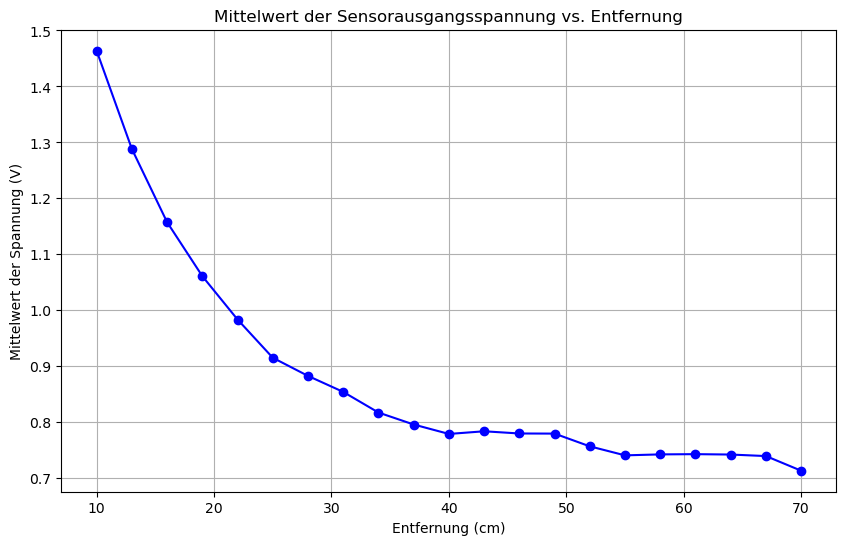

Mittelwerte und Standardabweichungen pro Entfernung:
Entfernung: 10 cm - Mittelwert: 1.46 V, Standardabweichung: 0.02 V
Entfernung: 13 cm - Mittelwert: 1.29 V, Standardabweichung: 0.02 V
Entfernung: 16 cm - Mittelwert: 1.16 V, Standardabweichung: 0.02 V
Entfernung: 19 cm - Mittelwert: 1.06 V, Standardabweichung: 0.02 V
Entfernung: 22 cm - Mittelwert: 0.98 V, Standardabweichung: 0.02 V
Entfernung: 25 cm - Mittelwert: 0.92 V, Standardabweichung: 0.02 V
Entfernung: 28 cm - Mittelwert: 0.88 V, Standardabweichung: 0.02 V
Entfernung: 31 cm - Mittelwert: 0.85 V, Standardabweichung: 0.02 V
Entfernung: 34 cm - Mittelwert: 0.82 V, Standardabweichung: 0.02 V
Entfernung: 37 cm - Mittelwert: 0.80 V, Standardabweichung: 0.02 V
Entfernung: 40 cm - Mittelwert: 0.78 V, Standardabweichung: 0.02 V
Entfernung: 43 cm - Mittelwert: 0.78 V, Standardabweichung: 0.02 V
Entfernung: 46 cm - Mittelwert: 0.78 V, Standardabweichung: 0.02 V
Entfernung: 49 cm - Mittelwert: 0.78 V, Standardabweichung: 0.02 V
Entfernun

In [17]:
import csv
import numpy as np
import matplotlib.pyplot as plt

def analyze_sensor_data(filename):
    try:
        with open(filename, 'r', newline='') as file:
            reader = csv.reader(file, delimiter=';')  # Verwende Semikolon als Trennzeichen
            data = []
            # Überspringe die ersten drei Zeilen (Header und Einheiten)
            for _ in range(3):
                next(reader)
            # Sammle nur die nächsten 3000 Spannungswerte
            for i, row in enumerate(reader):
                if i < 3000:  # Nur die ersten 3000 Werte lesen
                    if row and len(row) > 1:  # Sicherstellen, dass die Zeile nicht leer ist und genug Daten enthält
                        # Ersetze Kommas durch Punkte und konvertiere zu float
                        voltage_value = float(row[1].replace(',', '.'))
                        data.append(voltage_value)
                else:
                    break

        if not data:  # Überprüfen, ob Daten vorhanden sind
            raise ValueError(f"Datei: {filename} enthält keine Daten nach dem Überspringen der Kopfzeilen.")
        
        mean_val = np.mean(data)
        std_dev = np.std(data)
        return mean_val, std_dev
    except Exception as e:
        print(f"Fehler beim Lesen von {filename}: {e}")
        return None, None

def plot_sensor_data(distances, means):
    plt.figure(figsize=(10, 6))
    plt.plot(distances, means, marker='o', linestyle='-', color='blue')
    plt.title("Mittelwert der Sensorausgangsspannung vs. Entfernung")
    plt.xlabel("Entfernung (cm)")
    plt.ylabel("Mittelwert der Spannung (V)")
    plt.grid(True)
    plt.show()

# Pfad zum Ordner und Dateinamen
folder_path = r'C:\Users\leo11\OneDrive\Desktop\HTWG\AIN\Semester 3\SSS\Labor1\data\\'
filenames = [f"{folder_path}{i}.csv" for i in range(10, 71, 3)]
distances = np.arange(10, 71, 3)  # Entfernungen von 10 cm bis 70 cm, in 3 cm Schritten
means = []
std_devs = []

for filename in filenames:
    mean, std = analyze_sensor_data(filename)
    if mean is not None and std is not None:
        means.append(mean)
        std_devs.append(std)
    else:
        means.append(np.nan)  # Fügt NaN hinzu, wenn ein Fehler auftritt
        std_devs.append(np.nan)

# Plot nur, wenn Daten vorhanden
if not all(np.isnan(means)):
    plot_sensor_data(distances, means)
    print("Mittelwerte und Standardabweichungen pro Entfernung:")
    for dist, mean, std in zip(distances, means, std_devs):
        print(f"Entfernung: {dist} cm - Mittelwert: {mean:.2f} V, Standardabweichung: {std:.2f} V")
else:
    print("Keine gültigen Daten zum Plotten.")










